In [213]:
import numpy as np
import sympy as sp
import math
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams['lines.linewidth'] = 2

$$
f(x) = x^{3} - 3x^{2} - 9x - 5
$$

In [132]:
def f(x: float) -> float:
    return x**3 -3*x**2-9*x-5
x = np.linspace(-10, 10, num=150)
y = np.fromiter(map(f, x), float)

In [133]:
def xp(a: list[float]) -> float:
    n = len(a) - 1
    return 1 + 1 / abs(a[n])  * max(*map(abs, a[:n]))

print(xp([-5, -9, -3, 1]))

10.0


$$
x_{p} \leq 10.0
$$

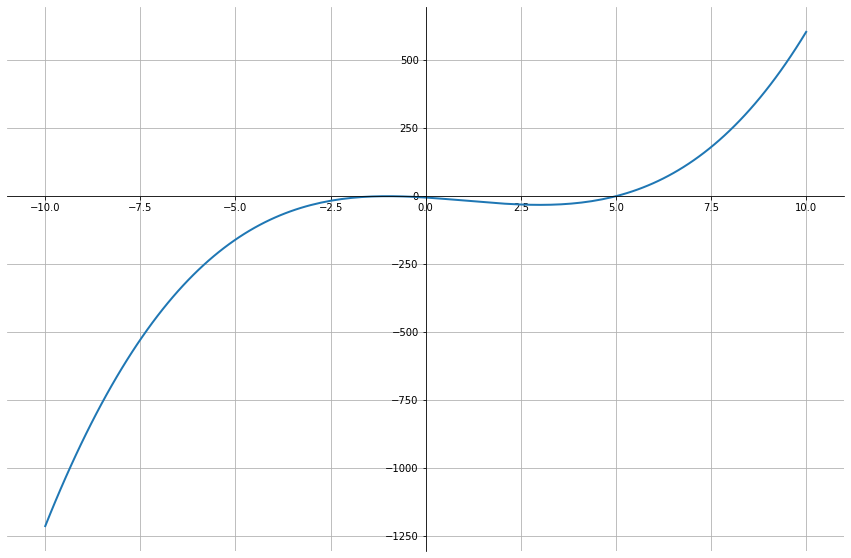

In [134]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid()
ax.plot(x,y)

$$
x_{1} \in [-2.5, 0]
$$
$$
x_{2} \in [2.5, 5.0]
$$

In [135]:
p = np.array([1, -3, -9, -5])
roots = np.roots(p)

print(sorted([*map(np.round, roots)]))

[(-1+0j), (-1-0j), (5+0j)]


$$
x_{1, 2} = -1
$$
$$
x_{3} = 5
$$

In [136]:
def bisection_method(f, xl: float, xr: float, epsilon: float, max_iter: int) -> tuple[float, int]:
    for n in range(0, max_iter):
        xd = xr - xl
        xd = xd / 2
        xm = xl + xd
        if abs(f(xm)) <= epsilon:
            return xm, n + 1
        else:
            if np.sign(f(xl)) != np.sign(f(xm)):
                xr = xm
            else:
                xl = xm
    return None, max_iter
                       
x_3, N = bisection_method(f, 4.0, 5.5, 1e-16, 500)
print(x_3, N)

5.0 50


### Метод бисекции
$$
x_{L} = 4.0 \ \ \ x_{R} = 5.5
$$
$$
x_{3} = 5 \ \ \ (\varepsilon = 10^{-16})
$$
$$
N = 50 \ \ (\text{кол-во итераций})
$$

In [137]:
def newton_method(f, Df, x0: float, epsilon: float, max_iter: int) -> tuple[float, int]:
    N = 0
    xn = x0
    for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            return xn, n + 1
        Dfxn = Df(xn)
        if Dfxn == 0:
            return None, n + 1
        xn = xn - fxn/Dfxn
    return None, max_iter

def newton_method_modified(f, x0: float, epsilon: float, max_iter: int) -> tuple[float, int]:
    N = 0
    xn = x0
    dx = epsilon
    for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            return xn, n + 1
        Dfxn = f(xn+dx) - f(xn)
        if Dfxn == 0:
            return None, n + 1
        xn = xn - fxn*dx/Dfxn
    return None, max_iter

x = sp.Symbol('x')
sym_f = x**3 -3*x**2-9*x-5
sym_Df = sym_f.diff(x)
f = lambdify(x, sym_f, 'numpy')
Df = lambdify(x, sym_Df, 'numpy')

x_1, N = newton_method_modified(f, -2.5, 1e-10, 500)
print(x_1, N)

x_3, N = newton_method(f, Df, 5.5, 1e-16, 500)
print(x_3, N)

-1.000003663214419 20
5.0 6


### Метод Ньютона модифицированный
$$
x_{0} = -1.5
$$
$$
x_{1, 2} = -1 \ \ \ (\varepsilon = 10^{-10})
$$
$$
N = 14 \ \ (\text{кол-во итераций})
$$
При большей точности метод не работает, т.к. знаменатель становится слишком маленьким (равным $0$)



### Метод Ньютона
$$
x_{0} = 5.5
$$
$$
x_{3} = 5 \ \ \ (\varepsilon = 10^{-16})
$$
$$
N = 6 \ \ (\text{кол-во итераций})
$$

In [185]:
def my_sqrt(phi, a: float,  x0: float, epsilon: float, max_iter: int) -> float:
    xn = x0
    for n in range(0, max_iter):
        if abs(xn ** 2 - a) < epsilon:
            return xn, n + 1
        xn = phi(xn)        
    return None, max_iter

a = 16
phi = lambda x: 1/ 2 * (a / x + x)
x, N = my_sqrt(phi, a, 1.5, 1e-16, 500)
print(x, N)

4.0 7


### Метод простой итерации для нахождения квадратного корня
$$
\varphi(x) = \frac{1}{2} (\frac{a}{x} + {x})
$$

$$
a = 16
$$

$$
x_{0} = 1.5
$$
$$
x = 4.0 \ \ \ (\varepsilon = 10^{-16})
$$
$$
N = 7 \ \ (\text{кол-во итераций})
$$

In [196]:
def estimate_area_of_convergence(sym_f):
    sym_Df = sym_f.diff(x)
    f = lambdify(x, sym_f, 'numpy')
    Df = lambdify(x, sym_Df, 'numpy')
    x1 = sp.solveset(sp.Eq(sym_Df, -1), 'x')
    x2 = sp.solveset(sp.Eq(sym_Df, 1), 'x')
    return sorted([*x1, *x2])
     
a = 16
x = sp.Symbol('x')
sym_f = x**2 + x - a
x1, x2 = estimate_area_of_convergence(sym_f)
print(x1, x2)

-1 0


### Оценка сходимости представления
$$
a = 16
$$
$$
\varphi(x) = x^{2} + x - a
$$
$$
x \in [-1, 0] - \text{область сходимости}
$$
Т.к. это представление квадратного корня из $a$ , $a$ должно лежать в отрезке $[0, 1]$

In [211]:
a = 0.5
phi = lambda x: x**2 + x - a
x, N = my_sqrt(phi, a, 0.5, 1e-15, 5000)
print(x, N)

-0.7071067811865479 41


### В области сходимости всё нормально считается.
$$
a = 0.5
$$

$$
\varphi(x) = x^{2} + x - a
$$

$$
x \in [-1, 0] - \text{область сходимости}
$$

$$
x_{0} = 0.5
$$

$$
x = -0.7071067811865479 \ \ \ (\varepsilon = 10^{-15}) - \text{при}\ \varepsilon = 10^{-16}\  \text{ не считает даже при 5000 итераций}
$$

$$
N = 41 \ \ (\text{кол-во итераций})
$$

In [212]:
a = 0.5
phi = lambda x: x**2 + x - a
x, N = my_sqrt(phi, a, 10, 1e-16, 100)
print(x, N)

OverflowError: (34, 'Numerical result out of range')

### Вне области сходимости происходит переполнение.
$$
a = 0.5
$$

$$
\varphi(x) = x^{2} + x - a
$$

$$
x \in [-1, 0] - \text{область сходимости}
$$

$$
x_{0} = 10
$$

$$
x = None \ \ \ \text{Произошло переполнение}
$$

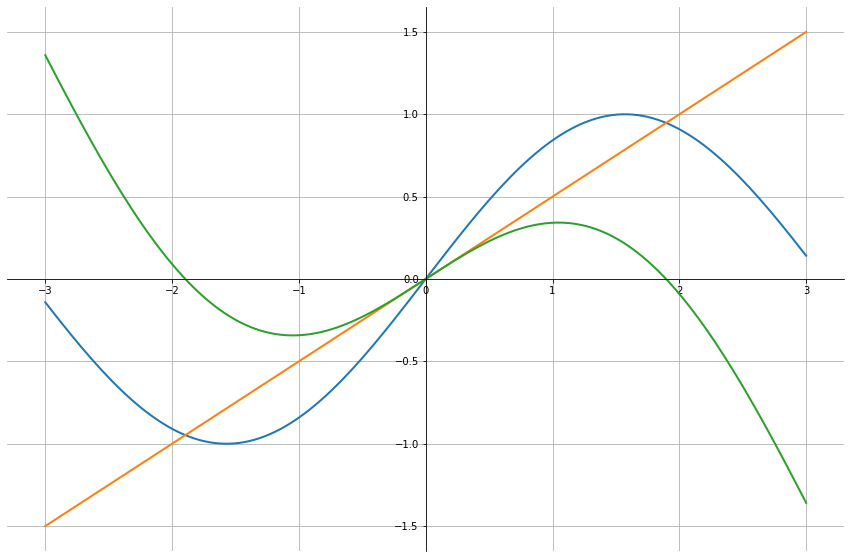

In [223]:
x = np.linspace(-3, 3, num=150)
y1 = np.fromiter(map(math.sin, x), float)
y2 = np.fromiter(map(lambda x: x / 2, x), float)
y3 = np.fromiter(map(lambda x: math.sin(x)- x / 2, x), float)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid()
ax.plot(x,y1)
ax.plot(x,y2)
ax.plot(x,y3)

Примерные корни:
$$
x_{1} = -1.9
$$

$$
x_{2} = 0
$$

$$
x_{3} = 1.9
$$

In [226]:
x_1, N = bisection_method(lambda x: math.sin(x) - x / 2, -3, -1, 1e-16, 500)
print(x_1, N)

x_2, N = bisection_method(lambda x: math.sin(x) - x / 2, -0.5, 0.5, 1e-16, 500)
print(x_2, N)

x_3, N = bisection_method(lambda x: math.sin(x) - x / 2, 1, 3, 1e-16, 500)
print(x_3, N)

-1.895494267033981 51
0.0 1
1.895494267033981 51


### Метод бисекции
$$
x_{L} = -3 \ \ \ x_{R} = -1
$$
$$
x_{1} = -1.895494267033981 \ \ \ (\varepsilon = 10^{-16})
$$
$$
N = 51 \ \ (\text{кол-во итераций})
$$

$$
x_{L} = -0.5 \ \ \ x_{R} = 0.5
$$
$$
x_{2} = 0.0 \ \ \ (\varepsilon = 10^{-16})
$$
$$
N = 50 \ \ (\text{кол-во итераций})
$$

$$
x_{L} = 1 \ \ \ x_{R} = 3
$$
$$
x_{3} = 1.895494267033981 \ \ \ (\varepsilon = 10^{-16})
$$
$$
N = 51 \ \ (\text{кол-во итераций})
$$

In [230]:
x = sp.Symbol('x')
sym_f = sin(x) - x / 2
sym_Df = sym_f.diff(x)
f = lambdify(x, sym_f, 'numpy')
Df = lambdify(x, sym_Df, 'numpy')

x_1, N = newton_method(f, Df, -3, 1e-16, 500)
print(x_1, N)

x_2, N = newton_method(f, Df, 0.5, 1e-16, 500)
print(x_2, N)

x_3, N = newton_method(f, Df, 3, 1e-16, 500)
print(x_3, N)

-1.895494267033981 6
0.0 5
1.895494267033981 6


### Метод Ньютона
$$
x_{0} = -3
$$
$$
x_{1} = -1.895494267033981 \ \ \ (\varepsilon = 10^{-16})
$$
$$
N = 6 \ \ (\text{кол-во итераций})
$$

$$
x_{0} = 0.5
$$
$$
x_{2} = 0.0 \ \ \ (\varepsilon = 10^{-16})
$$
$$
N = 5 \ \ (\text{кол-во итераций})
$$

$$
x_{0} = 3
$$
$$
x_{3} = 1.895494267033981 \ \ \ (\varepsilon = 10^{-16})
$$
$$
N = 6 \ \ (\text{кол-во итераций})
$$

In [241]:
def iteration_method(phi, f,  x0: float, epsilon: float, max_iter: int) -> float:
    xn = x0
    for n in range(0, max_iter):
#         print(xn, f(xn))
        if abs(f(xn)) < epsilon:
            return xn, n + 1
        xn = phi(xn)        
    return None, max_iter

a = 16
phi = lambda x: 2*math.sin(x)
f = lambda x:  math.sin(x) - x/2

x_1, N = iteration_method(phi, f, -3, 1e-15, 10000)
print(x_1, N)

x_3, N = iteration_method(phi, f, 3, 1e-15, 10000)
print(x_3, N)


-1.8954942670339798 77
1.8954942670339798 77


### Метод простых итераций
$$
x_{0} = -3
$$
$$
x_{1} = -1.8954942670339798 \ \ \ (\varepsilon = 10^{-15})
$$
$$
N = 77 \ \ (\text{кол-во итераций})
$$


$$
x_{0} = 3
$$
$$
x_{3} = 1.8954942670339798 \ \ \ (\varepsilon = 10^{-15})
$$
$$
N = 77 \ \ (\text{кол-во итераций})
$$